<a href="https://colab.research.google.com/github/gamberoillecito/Mapping-quantum-circuits-to-modular-architectures-with-QUBO/blob/main/introduction_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qiskit and the IQM Spark Quantum Computer

## Installing necessary packages

Before we begin, you will need to install some prerequisites into your environment. Run the cell below to complete these installations.

In [ ]:
%pip install uv --quiet
!uv pip install iqm-client[qiskit]==29.14 --quiet

%pip install lagrangeclient --index-url https://gitlab.linksfoundation.com/api/v4/projects/1709/packages/pypi/simple

%pip install matplotlib pylatexenc --quiet # Only for visualization purposes

Let's now get the authentication token.

In [ ]:
!lagrangeclient

## On Windows
# import sys
# !{sys.executable} -m lagrangeclient

Once you click on the url, you should see something like this:

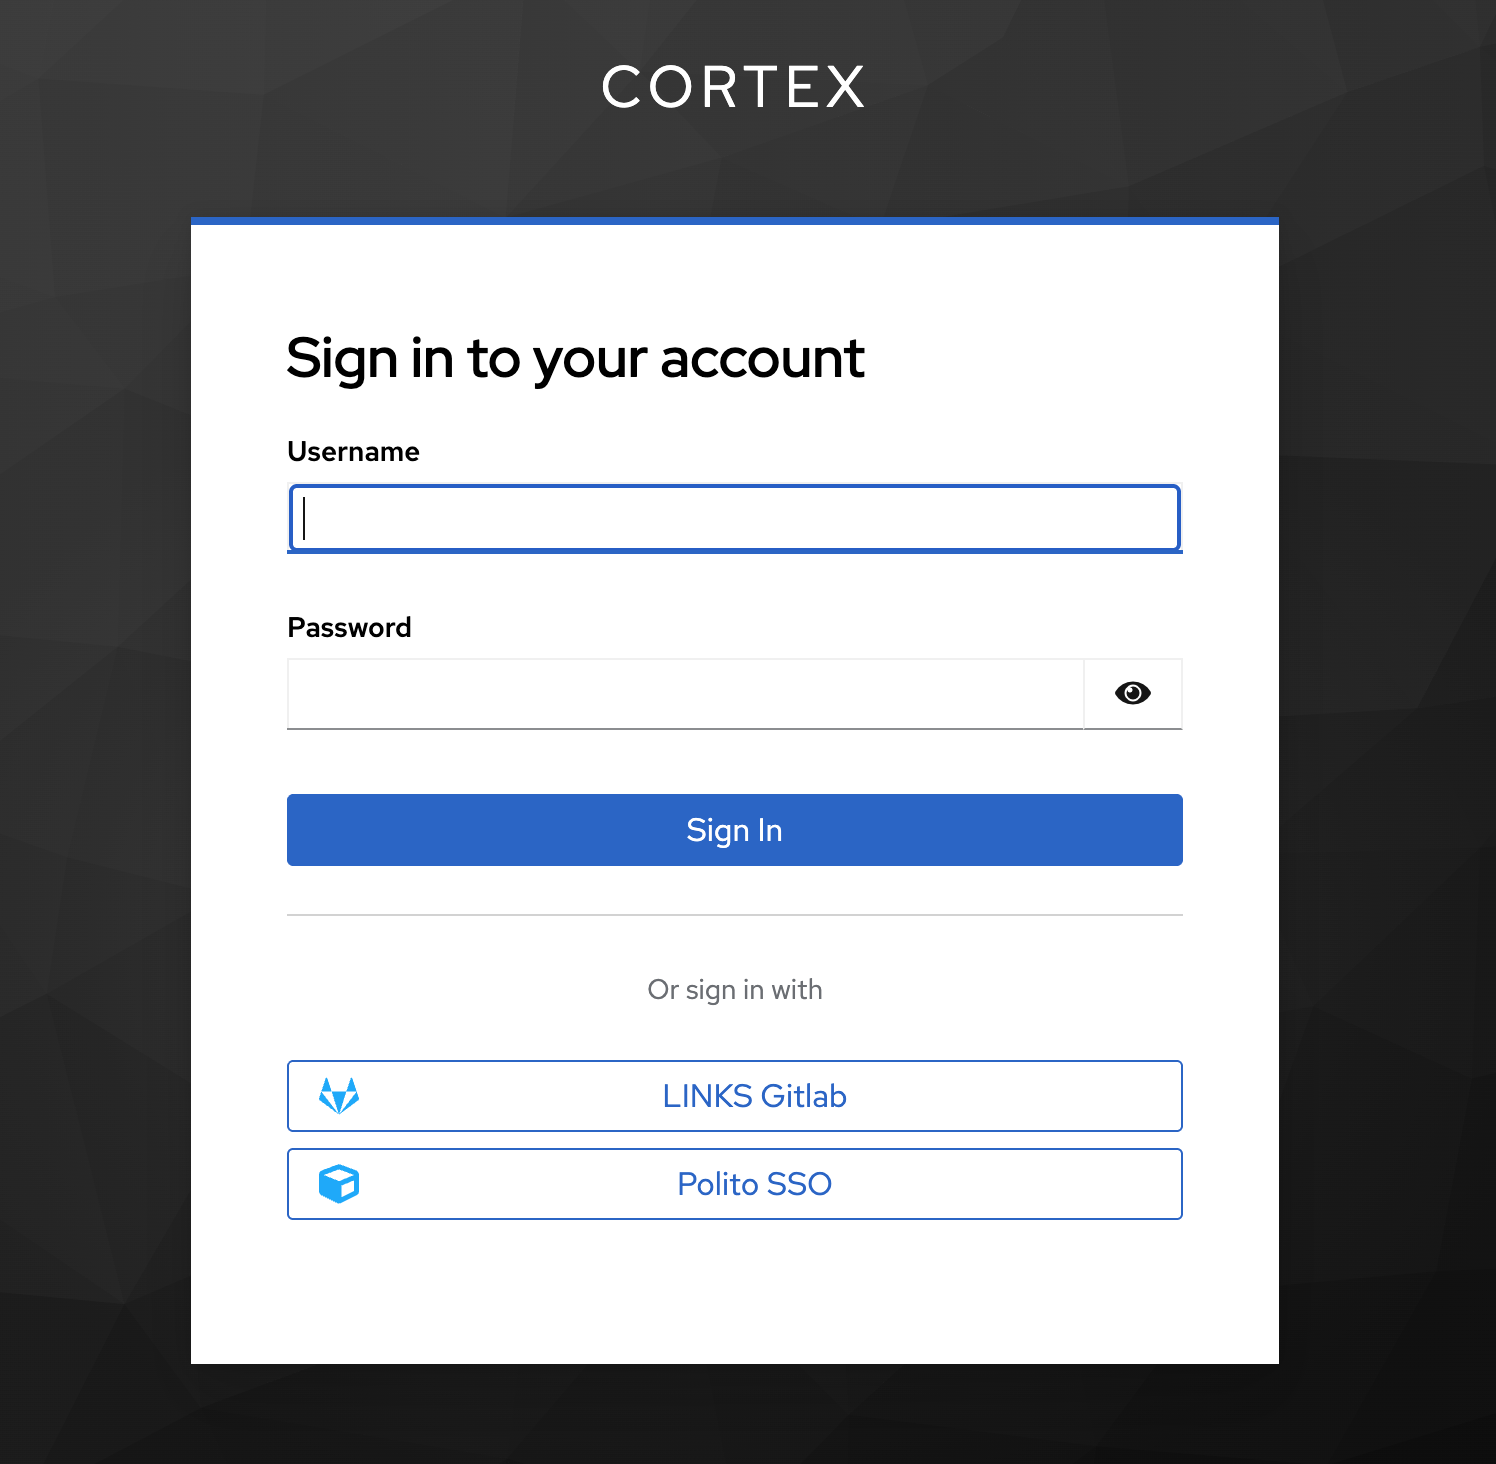

Then, we can initialize a variable to store our token

In [ ]:
import json
with open('tokens.json', 'r') as f:
    config = json.load(f)
access_token = config['access_token']

And import what we'll use

In [ ]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import BackendSampler

from iqm.qiskit_iqm import IQMProvider

## A Simple Example

### Let's use Qiskit to create the example circuit in the figure
<img src='https://drive.google.com/uc?id=1dW_z9oCSSoSSm4ZYOvyKPg_TxtHFESuy' width="340" height="200">

In [ ]:
bell = QuantumCircuit(2) # create a quantum circuit with 2 qubits and 2 classical bits

bell.h(0)           # apply an H gate to the circuit
bell.cx(0,1)        # apply a CNOT gate to the circuit

bell.measure_all()  # measure the qubits

bell.draw(output="mpl")


### runs on real hardware

In [ ]:
# service = QiskitRuntimeService(channel='ibm_quantum', token="")
# ibm_backend = service.least_busy(operational=True)

provider = IQMProvider(url="https://spark.quantum.linksfoundation.com/station", token=access_token)
lagrange_backend = provider.get_backend()

pm = generate_preset_pass_manager(optimization_level=1, backend=lagrange_backend)
bell = pm.run(bell)

# options = {"shots": 1024}
# sampler = BackendSampler(backend=lagrange_backend, options=options)
# # bell.metadata = {"project":"2025_training_polito"} # 2025_cpe_internal
# job = sampler.run([bell])


job = lagrange_backend.run(bell, shots=1024)

In [ ]:
print(f">>> Job Status: {job.status()}")

while job.status() in ['QUEUED', 'RUNNING']:
    if job.status() == 'QUEUED':
        continue
    elif job.status() == 'RUNNING':
        print(f">>> Job Status: {job.status()}")
        break

>>> Job Status: JobStatus.DONE


In [ ]:
job.job_id()

In [ ]:
result = job.result()
try:
  print(result.get_counts())
except:
  binary_prob = result.quasi_dists[0].binary_probabilities()
  print(binary_prob)
  counts_dict = {key:int(value*result.metadata[0]['shots']) for key, value in binary_prob.items()}
  print(counts_dict)

In [ ]:
from iqm.qiskit_iqm import IQMJob

retrieved_job = IQMJob(backend=lagrange_backend, job_id='5aed2f04-26d5-485b-8a4c-5eee17458e1c')

In [ ]:
retrieved_job.status()

<JobStatus.DONE: 'job has successfully run'>